# Dataset Description<br>
This dataset consist 11 features and a target variable.<br> 
**1. Age:** Patient's Age in Years<br>
**2. Sex:** Gender of Patient (Male->1,Female->0)<br>
**3. Chest Pain Type:** Type of chest pain experienced by patient categorized into: 1. Typical 2. Typical Angina 3. Non anginal pain 4 Asymptotic<br>
**4. Resting bps:** Level of Blood Pressure at resting mode in mm/HG<br>
**5. Cholestrol:** Serum Chorestrol in mg/dl<br>
**6. Fasting Blood Sugar:** Blood Sugar levels on fasting>120 mg/dl represents as 1 incase of true and 0 as false.<br>
**7. Resting ecg:** Result of electrocardiogram while at rest are represented as 3 distinct values 0: Normal 1: Abnormality in ST-T wave 2: Left Venticular Hypertrophy<br>
**8. Max Heart Rate:** Maximum heart rate achieved.<br>
**9. Exercise Angina:** Angina induced by exercise, 0 depicting NO and 1 depicting Yes.<br>
**10. Oldpeak:** Exercise indused ST-depression in comparison with the state of rest.<br>
**11. ST slope:** ST segment measured in terms of slope during peak exercise. 0-> Normal,1-> upsloping, 2->Flat, 3->Downsampling<br>
**12. Target:** It is the target variable which we have to predict. 1-> Patient is suffering from heart disease risk, 0-> Patient is normal<br>

# Importing Libraries

In [1]:
from warn import patch
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Data wrangling and pre-processing
import pandas as pd
import numpy as np

In [4]:
#Data Visulalization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Train_test Split
from sklearn.model_selection import train_test_split 

In [6]:
# Model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score
from sklearn import metrics

In [7]:
#Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib
import sklearn
import xgboost as xgb
import keras
from scipy import stats
from sklearn.metrics import matthews_corrcoef

In [9]:
# Versions
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Sklearn: {}".format(sklearn.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))
print("Keras: {}".format(keras.__version__))

Pandas: 1.4.2
Numpy: 1.21.5
Sklearn: 1.0.2
Matplotlib: 3.5.1
Keras: 2.10.0


# Loading Dataset

In [10]:
dt=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [11]:
dt.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [12]:
#Making all the 1 in one group and 0 in other group target
dt.groupby('target').size()

target
0    561
1    629
dtype: int64

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


# Data cleaning and PreProcessing

In [14]:
#renaming features/columns to proper name
dt.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholestrol','fasting_blood_sugar','Resting_ecg','Max_Heart_rate','exercise_induced_angina','st_depression','st_slope','target']

In [15]:
#Converting features to categorical features
dt['chest_pain_type'][dt['chest_pain_type']==1]='Typical Angina'
dt['chest_pain_type'][dt['chest_pain_type']==2]='aTypical Angina'
dt['chest_pain_type'][dt['chest_pain_type']==3]='Non Angina Pain'
dt['chest_pain_type'][dt['chest_pain_type']==4]='Asymptotic'

In [16]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,0,172,0,0.0,1,0
1,49,0,Non Angina Pain,160,180,0,0,156,0,1.0,2,1
2,37,1,aTypical Angina,130,283,0,1,98,0,0.0,1,0
3,48,0,Asymptotic,138,214,0,0,108,1,1.5,2,1
4,54,1,Non Angina Pain,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,0,132,0,1.2,2,1
1186,68,1,Asymptotic,144,193,1,0,141,0,3.4,2,1
1187,57,1,Asymptotic,130,131,0,0,115,1,1.2,2,1
1188,57,0,aTypical Angina,130,236,0,2,174,0,0.0,2,1


In [17]:
dt['Resting_ecg'][dt['Resting_ecg']==0]='Normal'
dt['Resting_ecg'][dt['Resting_ecg']==1]='ST-T wave abnormility'
dt['Resting_ecg'][dt['Resting_ecg']==2]='Left Ventrical hypertropy'

In [18]:
dt['st_slope'][dt['st_slope']==1]='Upsloping'
dt['st_slope'][dt['st_slope']==2]='Flat'
dt['st_slope'][dt['st_slope']==3]='Downsloping'

In [19]:
dt['sex']=dt.sex.apply(lambda x:'male' if x==1 else 'female')

In [20]:
dt

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,male,aTypical Angina,140,289,0,Normal,172,0,0.0,Upsloping,0
1,49,female,Non Angina Pain,160,180,0,Normal,156,0,1.0,Flat,1
2,37,male,aTypical Angina,130,283,0,ST-T wave abnormility,98,0,0.0,Upsloping,0
3,48,female,Asymptotic,138,214,0,Normal,108,1,1.5,Flat,1
4,54,male,Non Angina Pain,150,195,0,Normal,122,0,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,male,Typical Angina,110,264,0,Normal,132,0,1.2,Flat,1
1186,68,male,Asymptotic,144,193,1,Normal,141,0,3.4,Flat,1
1187,57,male,Asymptotic,130,131,0,Normal,115,1,1.2,Flat,1
1188,57,female,aTypical Angina,130,236,0,Left Ventrical hypertropy,174,0,0.0,Flat,1


In [21]:
dt['chest_pain_type'].value_counts()

Asymptotic         625
Non Angina Pain    283
aTypical Angina    216
Typical Angina      66
Name: chest_pain_type, dtype: int64

In [22]:
dt['Resting_ecg'].value_counts()

Normal                       684
Left Ventrical hypertropy    325
ST-T wave abnormility        181
Name: Resting_ecg, dtype: int64

In [23]:
dt['st_slope'].value_counts()

Flat           582
Upsloping      526
Downsloping     81
0                1
Name: st_slope, dtype: int64

In [24]:
#Droping row with st_slope=0
dt.drop(dt[dt.st_slope==0].index,inplace=True)

In [25]:
dt['st_slope'].value_counts()

Flat           582
Upsloping      526
Downsloping     81
Name: st_slope, dtype: int64

In [26]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,male,aTypical Angina,140,289,0,Normal,172,0,0.0,Upsloping,0
1,49,female,Non Angina Pain,160,180,0,Normal,156,0,1.0,Flat,1
2,37,male,aTypical Angina,130,283,0,ST-T wave abnormility,98,0,0.0,Upsloping,0
3,48,female,Asymptotic,138,214,0,Normal,108,1,1.5,Flat,1
4,54,male,Non Angina Pain,150,195,0,Normal,122,0,0.0,Upsloping,0


In [27]:
dt.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
Resting_ecg                0
Max_Heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

# Exploratory Data Analysis

In [28]:
dt.shape

(1189, 12)

In [29]:
dt.describe(include=[np.number])

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


<AxesSubplot:xlabel='sex', ylabel='target'>

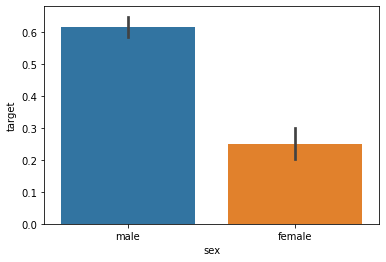

In [30]:
sns.barplot(dt['sex'],dt['target'])

<AxesSubplot:xlabel='sex', ylabel='age'>

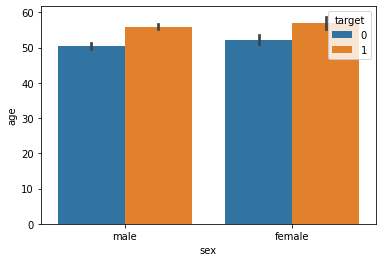

In [31]:
sns.barplot(dt['sex'],dt['age'],hue=dt['target'])

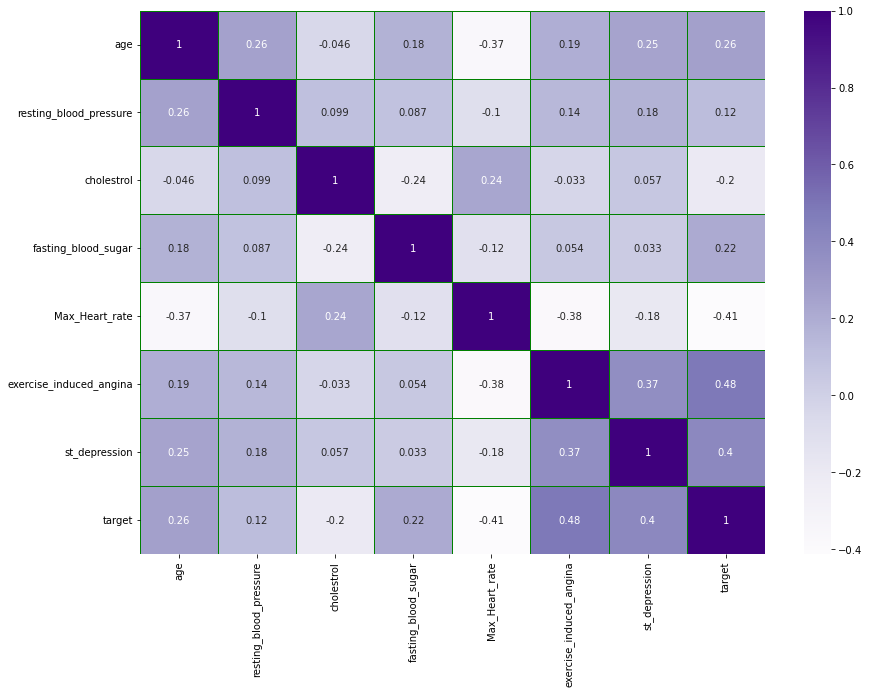

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(dt.corr(),cmap='Purples',annot=True,linecolor='Green', linewidth=1.0)
plt.show()

<AxesSubplot:xlabel='age'>

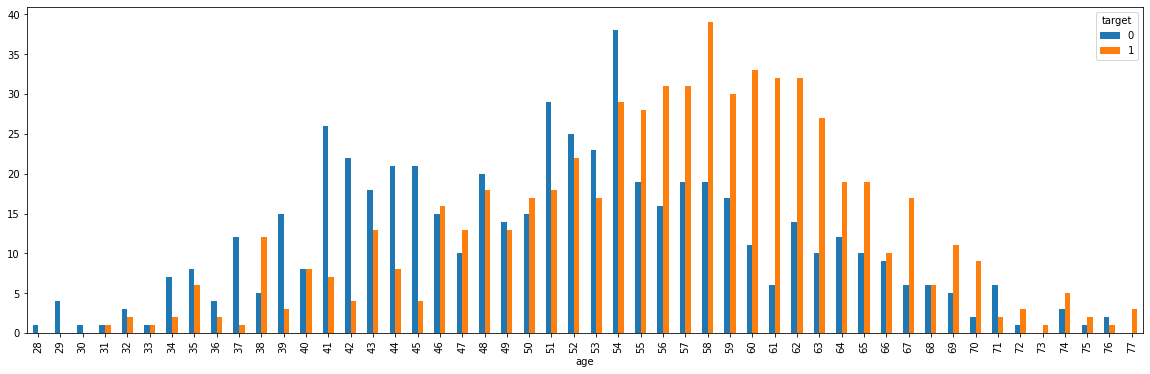

In [33]:
pd.crosstab(dt.age,dt.target).plot(kind='bar',figsize=(20,6))

In [34]:
dt.describe(include=[np.object])

,sex,chest_pain_type,Resting_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,male,Asymptotic,Normal,Flat
freq,908,625,683,582


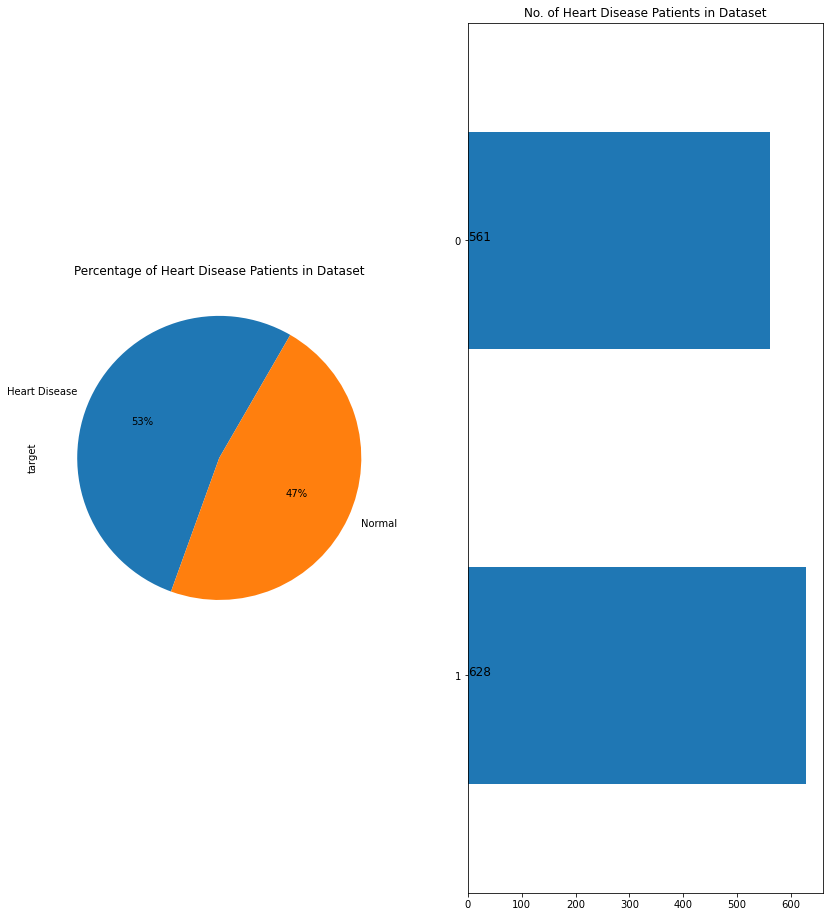

In [35]:
fig,(axis1,axis2)=plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,16))
axis1=dt['target'].value_counts().plot.pie(x="Heart Disease",y="No. of Pateints",autopct='%1.0f%%',labels=['Heart Disease', "Normal"], startangle=60,ax=axis1)
axis1.set(title="Percentage of Heart Disease Patients in Dataset")

axis2=dt['target'].value_counts().plot(kind='barh',ax=axis2)
for i,j in enumerate(dt['target'].value_counts().values):
    axis2.text(.5,i,j,fontsize=12)
axis2.set(title="No. of Heart Disease Patients in Dataset")
plt.show()

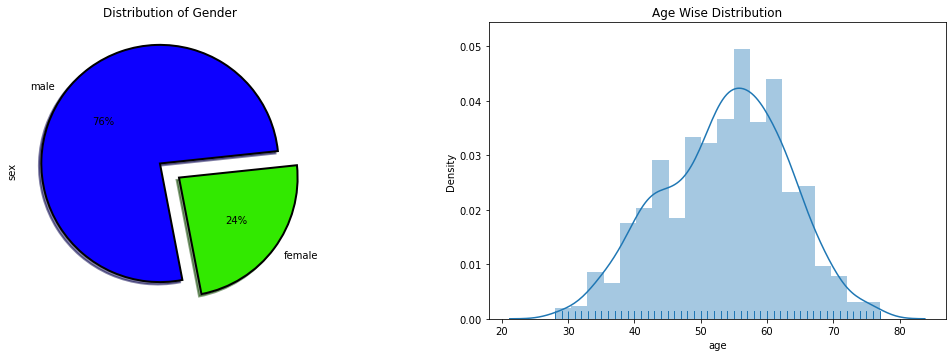

In [36]:
plt.figure(figsize=(18,12))
plt.subplot(221)
dt['sex'].value_counts().plot.pie(autopct='%1.0f%%',colors=sns.color_palette("prism",5),startangle=6,
                                 wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax=sns.distplot(dt['age'],rug=True)
plt.title("Age Wise Distribution")
plt.show()

In [37]:
attr_1=dt[dt["target"]==1]
attr_0=dt[dt["target"]==0]

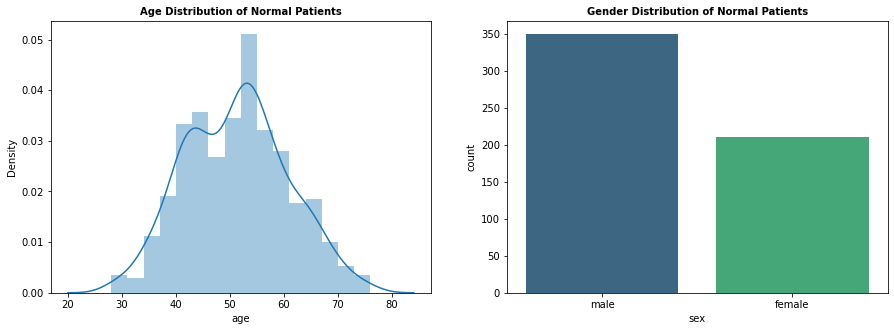

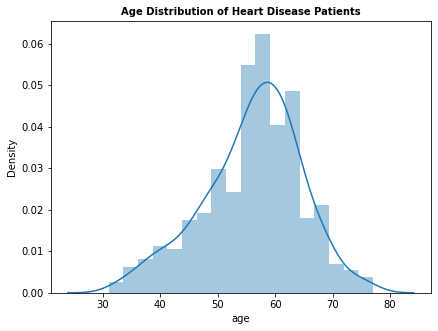

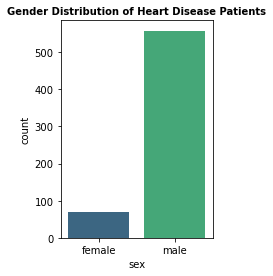

In [38]:
#Plotting normal Patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of Normal Patients',fontsize=10,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'],palette='viridis')
plt.title("Gender Distribution of Normal Patients",fontsize=10,weight="bold")
plt.show()
# plotting heart patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title("Age Distribution of Heart Disease Patients",fontsize=10,weight="bold")
plt.show()

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'],palette='viridis')
plt.title("Gender Distribution of Heart Disease Patients",fontsize=10,weight="bold")
plt.show()

# Distribution of Chest pain Types

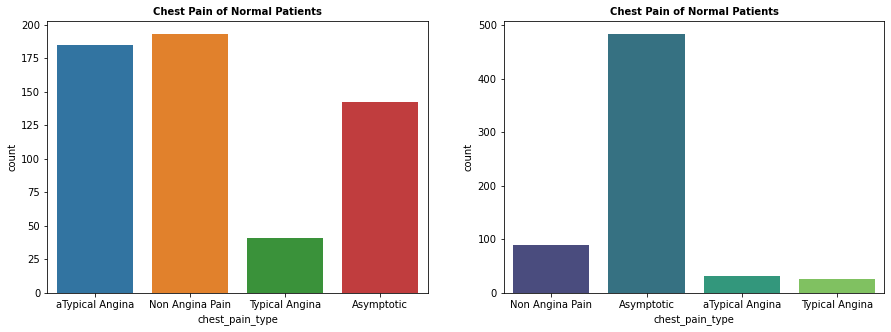

In [39]:
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['chest_pain_type'])
plt.title('Chest Pain of Normal Patients',fontsize=10,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['chest_pain_type'],palette='viridis')
plt.title("Chest Pain of Normal Patients",fontsize=10,weight="bold")
plt.show()

In [40]:
# Exploring the heart Disease Patients based on chest pain
plot_criteria=['chest_pain_type','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
chest_pain_type,,
Asymptotic,25.31,76.91
Non Angina Pain,34.40,14.17
Typical Angina,7.31,3.98
aTypical Angina,32.98,4.94


# Distribution of Rest ECG

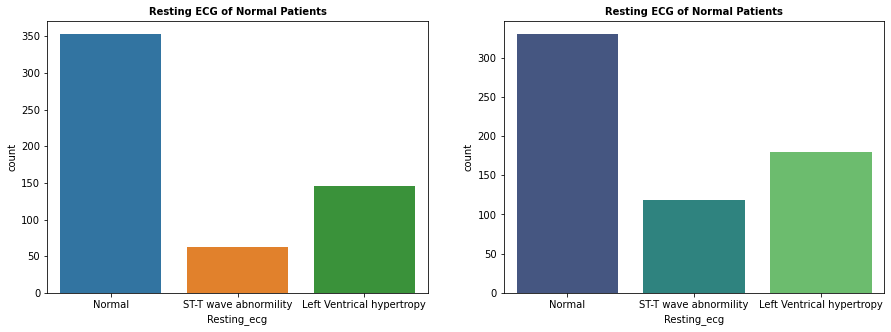

In [41]:
#Plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['Resting_ecg'])
plt.title('Resting ECG of Normal Patients',fontsize=10,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Resting_ecg'],palette='viridis')
plt.title("Resting ECG of Normal Patients",fontsize=10,weight="bold")
plt.show()

In [42]:
#Exploring the Heart Diesease Patients based on Rest ECG
plot_criteria = ['Resting_ecg','target']

In [43]:
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
Resting_ecg,,
Left Ventrical hypertropy,26.02,28.50
Normal,62.92,52.55
ST-T wave abnormility,11.05,18.95


# Distribution St_Slope

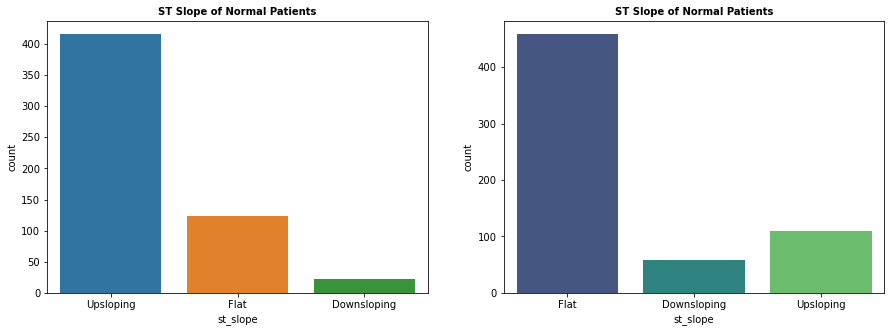

In [44]:
#Plotting normal patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['st_slope'])
plt.title('ST Slope of Normal Patients',fontsize=10,weight='bold')

ax1=plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['st_slope'],palette='viridis')
plt.title("ST Slope of Normal Patients",fontsize=10,weight="bold")
plt.show()

In [45]:
# Exploring the heart Disease Patients based on st_slope
plot_criteria=['st_slope','target']
cm=sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(dt[plot_criteria[0]],dt[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
st_slope,,
Downsloping,3.92,9.39
Flat,21.93,73.09
Upsloping,74.15,17.52


# Distribution of Numerical Features

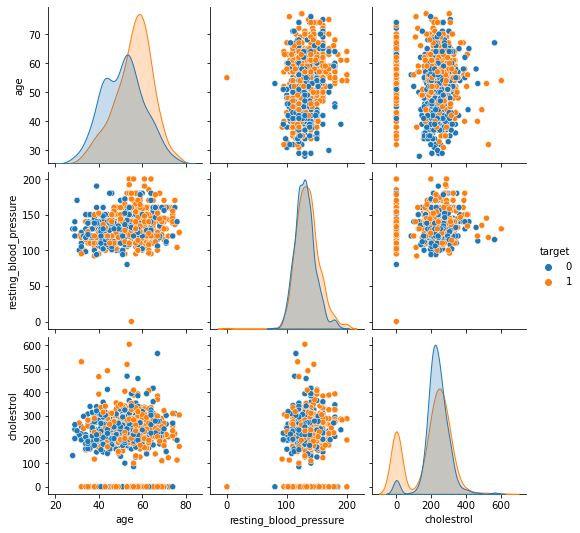

In [46]:
sns.pairplot(dt,hue='target',vars=['age','resting_blood_pressure','cholestrol'])

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholestrol'>

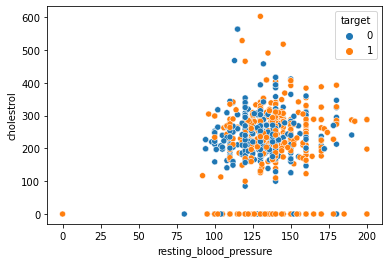

In [47]:
sns.scatterplot(x='resting_blood_pressure', y="cholestrol", hue='target', data=dt)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

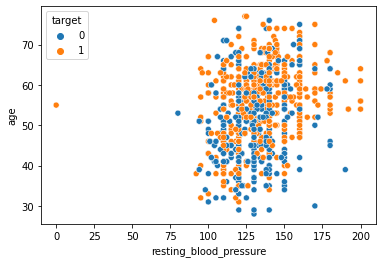

In [48]:
sns.scatterplot(x='resting_blood_pressure', y="age", hue='target', data=dt)

# Outlier Detection and Removal

In [49]:
'''z-score=((score or x)-mean)/Standard Deviation'''

'z-score=((score or x)-mean)/Standard Deviation'

In [50]:
#Filtering numeric features as age, resting bp, cholesterol and max heart rate achieved has outliers
dt_numeric=dt[['age','resting_blood_pressure','cholestrol','Max_Heart_rate']]

In [51]:
dt_numeric

,age,resting_blood_pressure,cholestrol,Max_Heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122
...,...,...,...,...
1185,45,110,264,132
1186,68,144,193,141
1187,57,130,131,115
1188,57,130,236,174


In [52]:
# Calculating zscore of numeric colums in the dataset
z=np.abs(stats.zscore(dt_numeric))

In [53]:
print(z)

           age  resting_blood_pressure  cholestrol  Max_Heart_rate
0     1.466266                0.428136    0.775228        1.264301
1     0.503599                1.517370    0.299516        0.637259
2     1.787155                0.116481    0.716067        1.635766
3     0.610562                0.319212    0.035725        1.243865
4     0.031216                0.972753    0.151616        0.695204
...        ...                     ...         ...             ...
1185  0.931451                1.205715    0.528727        0.303303
1186  1.528698                0.645983    0.171336        0.049408
1187  0.352105                0.116481    0.782658        0.969535
1188  0.352105                0.116481    0.252646        1.342681
1189  1.680192                0.319212    0.348816        1.303491

[1189 rows x 4 columns]


In [54]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z>3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [55]:
# Filtering outliers retaining only those data points which are below threshold
dt=dt[(z<3).all(axis=1)]
dt.shape

(1172, 12)

In [56]:
# Encoding categorial variables
dt=pd.get_dummies(dt,drop_first=True)
dt.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_Non Angina Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_Normal,Resting_ecg_ST-T wave abnormility,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,0,1,0,0,1,1,0,0,1
1,49,160,180,0,156,0,1.0,1,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,1
3,48,138,214,0,108,1,1.5,1,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,0,1,1,0,0,1,0,0,1


In [57]:
# Segregrating dataset into features i.e X and Target variable i.e Y
X=dt.drop(['target'],axis=1)
Y=dt['target']

In [58]:
X

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_male,chest_pain_type_Non Angina Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_Normal,Resting_ecg_ST-T wave abnormility,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,1,0,0,1,1,0,0,1
1,49,160,180,0,156,0,1.0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0.0,1,0,0,1,0,1,0,1
3,48,138,214,0,108,1,1.5,0,0,0,0,1,0,1,0
4,54,150,195,0,122,0,0.0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,110,264,0,132,0,1.2,1,0,1,0,1,0,1,0
1186,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
1187,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
1188,57,130,236,0,174,0,0.0,0,0,0,1,0,0,1,0


In [59]:
Y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1172, dtype: int64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

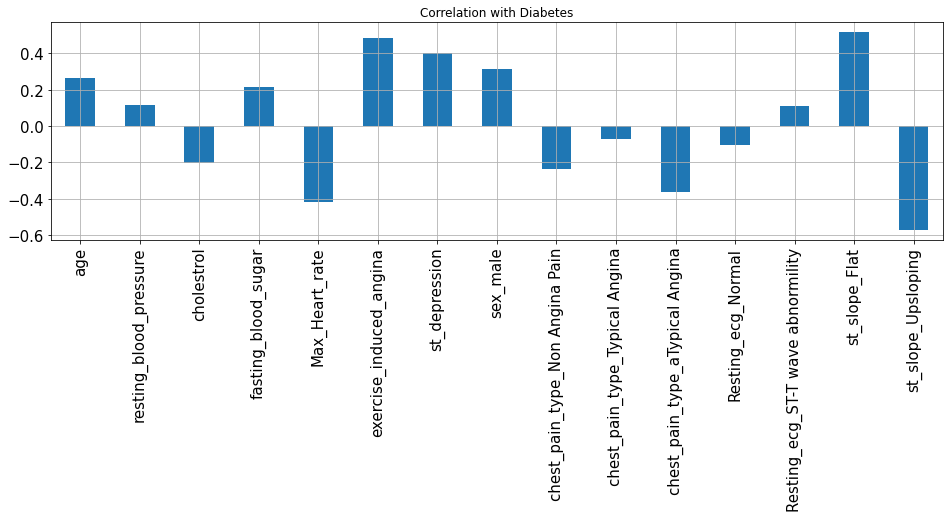

In [60]:
# Correlation with Response Variable Class
X.corrwith(Y).plot.bar(figsize=(16,4),title="Correlation with Diabetes", fontsize=15, rot=90, grid=True)

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=101)

In [62]:
# Checking Distribuation of target variable in train test split
print('Distribution of target variable in training set')
print(ytrain.value_counts())

Distribution of target variable in training set
1    489
0    448
Name: target, dtype: int64


In [63]:
# Checking Distribuation of target variable in train test split
print('Distribution of target variable in testing set')
print(ytest.value_counts())

Distribution of target variable in testing set
1    125
0    110
Name: target, dtype: int64


In [64]:
print('*'*25,'Training Set','*'*25)
print(xtrain.shape)
print(ytrain.shape)

print('*'*25,'Testing Set','*'*25)
print(xtest.shape)
print(ytest.shape)

************************* Training Set *************************
(937, 15)
(937,)
************************* Testing Set *************************
(235, 15)
(235,)


# Feature normalization
In this I will normalize all the numeric features in the range of 0 & 1

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler=MinMaxScaler()

In [67]:
xtrain[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholestrol,Max_Heart_rate,st_depression
605,74,155,310,112,1.5
89,55,140,229,110,0.5
520,63,96,305,121,1.0
372,66,150,0,108,2.0
222,51,160,303,150,1.0
...,...,...,...,...,...
586,57,180,285,120,0.8
988,34,118,182,174,0.0
77,35,140,167,150,0.0
611,46,134,310,126,0.0


In [68]:
xtrain[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']]=scaler.fit_transform(xtrain[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']])

In [69]:
xtrain.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_male,chest_pain_type_Non Angina Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_Normal,Resting_ecg_ST-T wave abnormility,st_slope_Flat,st_slope_Upsloping
605,0.938776,0.714286,0.631365,0,0.333333,1,0.465909,1,0,0,0,1,0,0,0
89,0.551020,0.571429,0.466395,0,0.318519,1,0.352273,1,0,0,0,1,0,1,0
520,0.714286,0.152381,0.621181,0,0.400000,1,0.409091,1,0,0,0,0,1,0,1
372,0.775510,0.666667,0.000000,0,0.303704,1,0.522727,1,0,0,0,1,0,1,0
222,0.469388,0.761905,0.617108,0,0.614815,1,0.409091,0,0,0,0,1,0,1,0


In [70]:
xtrain[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholestrol,Max_Heart_rate,st_depression
605,0.938776,0.714286,0.631365,0.333333,0.465909
89,0.551020,0.571429,0.466395,0.318519,0.352273
520,0.714286,0.152381,0.621181,0.400000,0.409091
372,0.775510,0.666667,0.000000,0.303704,0.522727
222,0.469388,0.761905,0.617108,0.614815,0.409091
...,...,...,...,...,...
586,0.591837,0.952381,0.580448,0.392593,0.386364
988,0.122449,0.361905,0.370672,0.792593,0.295455
77,0.142857,0.571429,0.340122,0.614815,0.295455
611,0.367347,0.514286,0.631365,0.437037,0.295455


In [71]:
xtest[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']]=scaler.transform(xtest[['age','resting_blood_pressure','cholestrol','Max_Heart_rate','st_depression']])

In [72]:
xtest.head()

,age,resting_blood_pressure,cholestrol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_male,chest_pain_type_Non Angina Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_Normal,Resting_ecg_ST-T wave abnormility,st_slope_Flat,st_slope_Upsloping
897,0.591837,0.571429,0.391039,0,0.600000,0,0.340909,1,0,0,0,1,0,1,0
392,0.857143,0.333333,0.000000,0,0.185185,1,0.295455,1,0,0,0,0,1,1,0
942,0.530612,0.419048,0.541752,0,0.311111,1,0.545455,1,0,0,0,0,0,1,0
982,0.489796,0.457143,0.519348,0,0.696296,1,0.295455,1,0,0,0,1,0,0,1
2,0.183673,0.476190,0.576375,0,0.229630,0,0.295455,1,0,0,1,0,1,0,1


# Cross Validation

In [73]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
# Function initializing baseline learning models
def GetBasedModel():
    basedmodels=[]
    basedmodels.append(('LR_L2',LogisticRegression(penalty='12')))
    basedmodels.append(('LDA',LinearDiscriminantAnalysis()))
    basedmodels.append(('KNN7',KNeighborsClassifier(7)))
    basedmodels.append(('KNN5',KNeighborsClassifier(5)))
    basedmodels.append(('KNN9',KNeighborsClassifier(9)))
    basedmodels.append(('KNN11',KNeighborsClassifier(11)))
    basedmodels.append(('CART',DecisionTreeClassifier()))
    basedmodels.append(('NB',GaussianNB()))
    basedmodels.append(('SVM Linear',SVC(kernel='linear',gamma='auto',probability=True)))
    basedmodels.append(('SVM RBF',SVC(kernel='rbf',gamma='auto',probability=True)))
    basedmodels.append(('AB',AdaBoostClassifier()))
    basedmodels.append(('GBM',GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    basedmodels.append(('RF_Ent100',RandomForestClassifier(criterion='entropy', n_estimators=100)))
    basedmodels.append(('RF_Gini100',RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedmodels.append(('ET100',ExtraTreesClassifier(n_estimators=100)))
    basedmodels.append(('ET500',ExtraTreesClassifier(n_estimators=500)))
    basedmodels.append(('MLP',MLPClassifier()))
    basedmodels.append(('SGD3000',SGDClassifier(max_iter=1000,tol=1e-4)))
    basedmodels.append(('XGB2000',xgb.XGBClassifier(n_estimators=2000)))
    basedmodels.append(('XGB500',xgb.XGBClassifier(n_estimators=500)))
    basedmodels.append(('XGB100',xgb.XGBClassifier(n_estimators=100)))
    basedmodels.append(('XGB1000',xgb.XGBClassifier(n_estimators=1000)))
    basedmodels.append(('ET1000',ExtraTreesClassifier(n_estimators=1000)))

    return basedmodels

In [75]:
# Function for performing 10 fold cross Validation of all the based models
def BaseLine2(xtrain,ytrain,models):
    # Test options and evaluation metric
    num_folds=10
    scoring='accuracy'
    seed=7
    results=[]
    names=[]
    for name,model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results=model_selection.cross_val_score(model,xtrain,ytrain,cv=kfold,scoring=scoring)
        results.append(name)
        msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
        print(msg)
    return results,msg

In [76]:
models= GetBasedModel()
names, results = BaseLine2(xtrain,ytrain,models)

LR_L2: nan (nan)
LDA: 0.840895 (0.026473)
KNN7: 0.839876 (0.033854)
KNN5: 0.846305 (0.022497)
KNN9: 0.838858 (0.029082)
KNN11: 0.835598 (0.033306)
CART: 0.853775 (0.023544)
NB: 0.829124 (0.028606)
SVM Linear: 0.844097 (0.029230)
SVM RBF: 0.838767 (0.032918)
AB: 0.853660 (0.038162)
GBM: 0.878266 (0.027391)
RF_Ent100: 0.916701 (0.031046)
RF_Gini100: 0.909243 (0.032616)
ET100: 0.913521 (0.030786)
ET500: 0.912446 (0.029119)
MLP: 0.841993 (0.031897)
SGD3000: 0.815260 (0.037194)
XGB2000: 0.894326 (0.031947)
XGB500: 0.894326 (0.035947)
XGB100: 0.902860 (0.036345)
XGB1000: 0.893262 (0.033169)
ET1000: 0.911382 (0.033534)


# Model Building

### Random Forest Classifier(Criterion='entropy')

In [77]:
rf_ent=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [78]:
y_pred_rfe=rf_ent.predict(xtest)

In [79]:
y_pred_rfe

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Multi Layer Perceptron

In [80]:
mlp=MLPClassifier()

In [81]:
mlp.fit(xtrain,ytrain)

MLPClassifier()

In [82]:
y_pred_mlp=mlp.predict(xtest)

In [83]:
y_pred_mlp

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## K Nearest Neighbours (n=9)

In [84]:
knn=KNeighborsClassifier(9)

In [85]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [86]:
y_pred_knn=knn.predict(xtest)

In [87]:
y_pred_knn

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Extra Tree Classifier (n_estimator=100)

In [88]:
et_100=ExtraTreesClassifier(n_estimators=100)
et_100.fit(xtrain,ytrain)
y_pred_et_100=et_100.predict(xtest)

In [89]:
y_pred_et_100

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## XGBoost (n_estimators=500)

In [90]:
Xgb=xgb.XGBClassifier(n_estimators=500)
Xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [91]:
y_pred_xgb=Xgb.predict(xtest)
y_pred_xgb

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

## Supper Vector Cllassifier (kernel='linear')

In [92]:
svc=SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(xtrain,ytrain)

SVC(gamma='auto', kernel='linear', probability=True)

In [93]:
y_pred_svc=svc.predict(xtest)
y_pred_svc

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Stochaistic Gradient Descent

In [94]:
sgd=SGDClassifier(max_iter=1000,tol=1e-4)
sgd.fit(xtrain,ytrain)

SGDClassifier(tol=0.0001)

In [95]:
y_pred_sgd=sgd.predict(xtest)
y_pred_sgd

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## AdaBoost Classifier

In [96]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [97]:
y_pred_ada=ada.predict(xtest)
y_pred_ada

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Decision Tree Classifier (CART)

In [98]:
decc=DecisionTreeClassifier()

In [99]:
decc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [100]:
y_pred_decc=decc.predict(xtest)

In [101]:
y_pred_decc

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

## Gradient Boosting Machine

In [102]:
gbm=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(max_features='sqrt')

In [103]:
y_pred_gbm=gbm.predict(xtest)
y_pred_gbm

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

## Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.948936,0.931298,0.976,0.918182,0.953125,0.947091,1.763713,0.898307


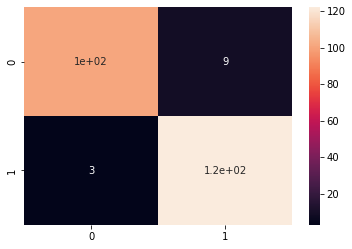

In [104]:
cm=confusion_matrix(ytest,y_pred_rfe)
sns.heatmap(cm,annot=True)
TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
specificity=TN/(TN+FP)
loss_log=log_loss(ytest,y_pred_rfe)
acc=accuracy_score(ytest,y_pred_rfe)
roc=roc_auc_score(ytest,y_pred_rfe)
prec=precision_score(ytest,y_pred_rfe)
rec=recall_score(ytest,y_pred_rfe)
f1=f1_score(ytest,y_pred_rfe)

mathew=matthews_corrcoef(ytest,y_pred_rfe)
model_results=pd.DataFrame([['Random Forest',acc,prec,rec,specificity,f1,roc,loss_log,mathew]],
                          columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score','ROC','Log Loss','Mathew'])
model_results

## Comaprision with other models

In [105]:
data={'MLP':y_pred_mlp,
     'KNN':y_pred_knn,
     'Extra Tree Classifier':y_pred_et_100,
     'XGB':y_pred_xgb,
     'SVC':y_pred_svc,
     'SGD':y_pred_sgd,
     'AdaBoost':y_pred_ada,
     'CART':y_pred_decc,
     'GBM':y_pred_gbm}

models=pd.DataFrame(data)

for column in models:
    cm=confusion_matrix(ytest,models[column])
    TN=cm[0][0]
    FN=cm[1][0]
    TP=cm[1][1]
    FP=cm[0][1]
    specificity=TN/(TN+FP)
    loss_log=log_loss(ytest,models[column])
    acc=accuracy_score(ytest,models[column])
    roc=roc_auc_score(ytest,models[column])
    prec=precision_score(ytest,models[column])
    rec=recall_score(ytest,models[column])
    f1=f1_score(ytest,models[column])
    
    
    mathew=matthews_corrcoef(ytest,models[column])
    results=pd.DataFrame([[column,acc,prec,rec,specificity,f1,roc,loss_log,mathew]],
                          columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score','ROC','Log Loss','Mathew'])
    model_results=model_results.append(results,ignore_index=True)
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.948936,0.931298,0.976,0.918182,0.953125,0.947091,1.763713,0.898307
1,MLP,0.889362,0.883721,0.912,0.863636,0.897638,0.887818,3.821362,0.777789
2,KNN,0.868085,0.840580,0.928,0.800000,0.882129,0.864000,4.556254,0.737832
3,Extra Tree Classifier,0.940426,0.930233,0.960,0.918182,0.944882,0.939091,2.057660,0.880619
4,XGB,0.948936,0.944882,0.960,0.936364,0.952381,0.948182,1.763706,0.897474
5,SVC,0.872340,0.862595,0.904,0.836364,0.882813,0.870182,4.409267,0.743779
6,SGD,0.876596,0.863636,0.912,0.836364,0.887160,0.874182,4.262293,0.752590
7,AdaBoost,0.863830,0.854962,0.896,0.827273,0.875000,0.861636,4.703217,0.726610
8,CART,0.880851,0.914530,0.856,0.909091,0.884298,0.882545,4.115292,0.763538
9,GBM,0.902128,0.886364,0.936,0.863636,0.910506,0.899818,3.380442,0.804152


## ROC AUC Curve

Text(0.5, 1.0, 'Receiver Operator Characteristic curves')

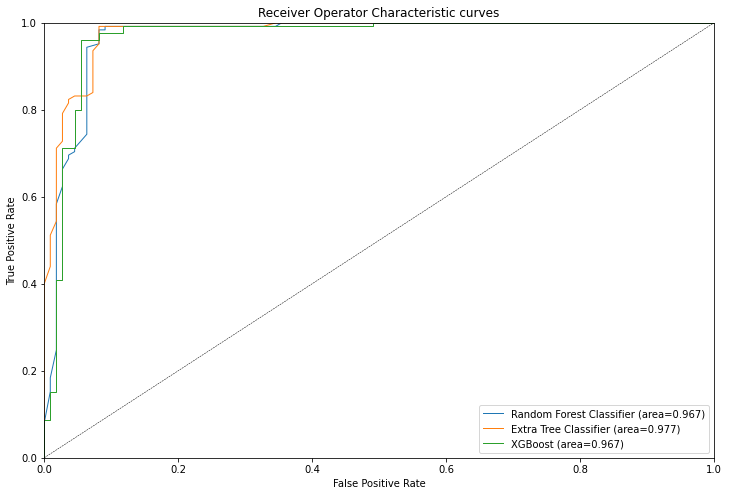

In [106]:
def roc_auc_plot(ytrue,yproba,label=' ',l='-',lw=1.0):
    from sklearn.metrics import roc_curve,roc_auc_score
    fpr,tpr,_=roc_curve(ytrue,yproba[:,1])
    ax.plot(fpr,tpr,linestyle=l,linewidth=lw,label="%s (area=%.3f)"%(label,roc_auc_score(ytrue,yproba[:,1])))

f,ax=plt.subplots(figsize=(12,8))
roc_auc_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
roc_auc_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
roc_auc_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')
ax.plot([0,1],[0,1],color='k',linewidth=0.5,linestyle='--')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic curves')

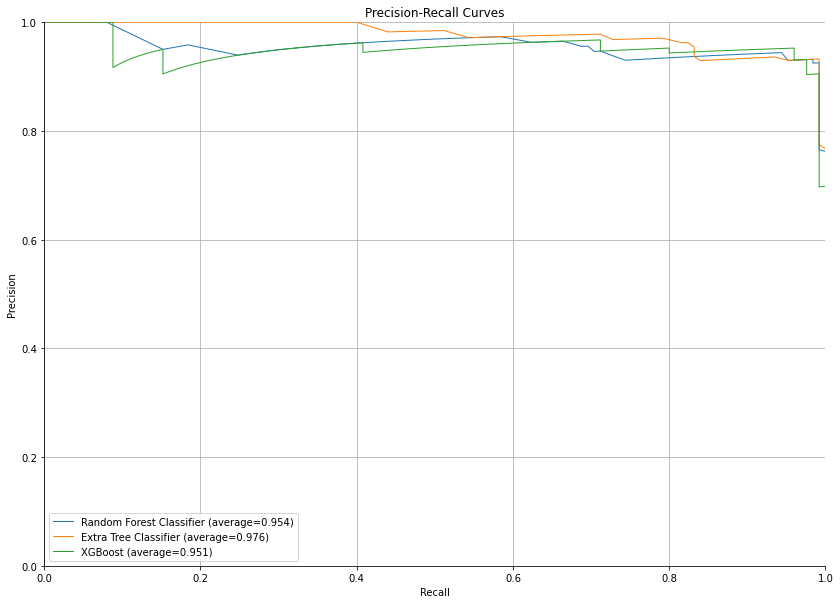

In [107]:
def precision_recall_plot(ytrue,yproba,label=" ",l='-',lw=1.0):
    from sklearn.metrics import precision_recall_curve,average_precision_score
    precision,recall,_=precision_recall_curve(ytest,yproba[:,1])
    average_precision=average_precision_score(ytest,yproba[:,1])
    ax.plot(recall,precision,label="%s (average=%.3f)"%(label,average_precision),
            linestyle=l,linewidth=lw)
f,ax=plt.subplots(figsize=(14,10))
precision_recall_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
precision_recall_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
precision_recall_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')

ax.legend(loc='lower left')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim([0,1])
ax.grid(True)
ax.set_ylim([0,1])
ax.set_title('Precision-Recall Curves')
sns.despine()

In [108]:
num_feats=11
def cor_selector(X,Y,num_feats):
    cor_list=[]
    feature_name=X.columns.tolist()
    #Calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor=np.corrcoef(X[i],Y)[0,1]
        cor_list.append(cor)
    #Replace NaN with 0
    cor_list=[0 if np.isnan(i) else i for i in cor_list]
    #feature name
    cor_feature=X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    #feature Selection? 0 for not select, 1 for select
    cor_support=[True if i in cor_feature else False for i in feature_name]
    return cor_support,cor_feature
cor_support,cor_feature=cor_selector(X,Y,num_feats)
print(str(len(cor_feature)),'selected features')

11 selected features


In [109]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [110]:
X_norm=MinMaxScaler().fit_transform(X)

In [111]:
chi_selector=SelectKBest(chi2,k=num_feats)

In [112]:
chi_selector.fit(X_norm,Y)

SelectKBest(k=11, score_func=<function chi2 at 0x0000024E43F1EB80>)

In [113]:
chi_support=chi_selector.get_support()

In [114]:
chi_feature=X.loc[:,chi_support].columns.tolist()

In [115]:
print(str(len(chi_feature)),'selected features')

11 selected features


In [116]:
from sklearn.feature_selection import RFE

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
rfe_selector=RFE(estimator=LogisticRegression(),n_features_to_select=num_feats,
                step=10,verbose=5)

In [119]:
rfe_selector.fit(X_norm,Y)

Fitting estimator with 15 features.


RFE(estimator=LogisticRegression(), n_features_to_select=11, step=10, verbose=5)

In [120]:
rfe_support=rfe_selector.get_support()

In [121]:
rfe_feature=X.loc[:,rfe_support].columns.tolist()

In [122]:
print(str(len(rfe_feature)),'selected features')

11 selected features


In [123]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [124]:
embeded_lr_selector=SelectFromModel(LogisticRegression(penalty='l2',solver='lbfgs'),max_features=num_feats)

In [125]:
embeded_lr_selector.fit(X_norm,Y)

SelectFromModel(estimator=LogisticRegression(), max_features=11)

In [126]:
embeded_lr_support=embeded_lr_selector.get_support()

In [127]:
embeded_lr_feature=X.loc[:,embeded_lr_support].columns.tolist()

In [128]:
print(str(len(embeded_lr_feature)),'selected features')

6 selected features


In [129]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector=SelectFromModel(RandomForestClassifier(n_estimators=100,criterion='gini'),max_features=num_feats)
embeded_rf_selector.fit(X,Y)
embeded_rf_support=embeded_rf_selector.get_support()
embeded_rf_feature=X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),'selected features')

8 selected features


In [130]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500,learning_rate=0.05,num_leaves=32,colsample_bytree=0.2,
                   reg_alpha=3,reg_lambda=1,min_split_gain=0.01,min_child_weight=40)
embeded_lgbc_selector=SelectFromModel(lgbc,max_features=num_feats)
embeded_lgbc_selector.fit(X,Y)
embeded_lgbc_support=embeded_lgbc_selector.get_support()
embeded_lgbc_feature=X.loc[:,embeded_lgbc_support].columns.tolist()
print(str(len(embeded_lgbc_feature)),'selected features')

7 selected features


In [132]:
#put all selection together
feature_name=X.columns
feature_selection_df=pd.DataFrame({'Feature':feature_name,'Pearson':cor_support,'Chi-2':chi_support,'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                  'Random Forest':embeded_rf_support,'LightGBM':embeded_lgbc_support})

In [133]:
#count the selected times for each feature
feature_selection_df['total']=np.sum(feature_selection_df,axis=1)

In [134]:
#Display the top 100
feature_selection_df=feature_selection_df.sort_values(['total','Feature'],ascending=False)
feature_selection_df.index=range(1,len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_Flat,True,True,True,False,True,True,5
3,exercise_induced_angina,True,True,True,False,True,True,5
4,cholestrol,True,False,True,True,True,True,5
5,Max_Heart_rate,True,True,True,False,True,True,5
6,st_slope_Upsloping,True,True,True,False,True,False,4
7,sex_male,True,True,True,True,False,False,4
8,chest_pain_type_aTypical Angina,True,True,True,True,False,False,4
9,chest_pain_type_Non Angina Pain,True,True,True,True,False,False,4
10,age,True,False,True,False,True,True,4
